<a href="https://colab.research.google.com/github/vignan8279/Deep_learning_fastai/blob/master/Fastai_practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
import warnings
warnings.filterwarnings('ignore')

#Exploring Data and labelling

In [6]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [7]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [8]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [10]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_151.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_151.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_71.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_169.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_93.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [12]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size = 224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
British_Shorthair,yorkshire_terrier,miniature_pinscher,staffordshire_bull_terrier,British_Shorthair
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
chihuahua,Sphynx,Egyptian_Mau,wheaten_terrier,havanese
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

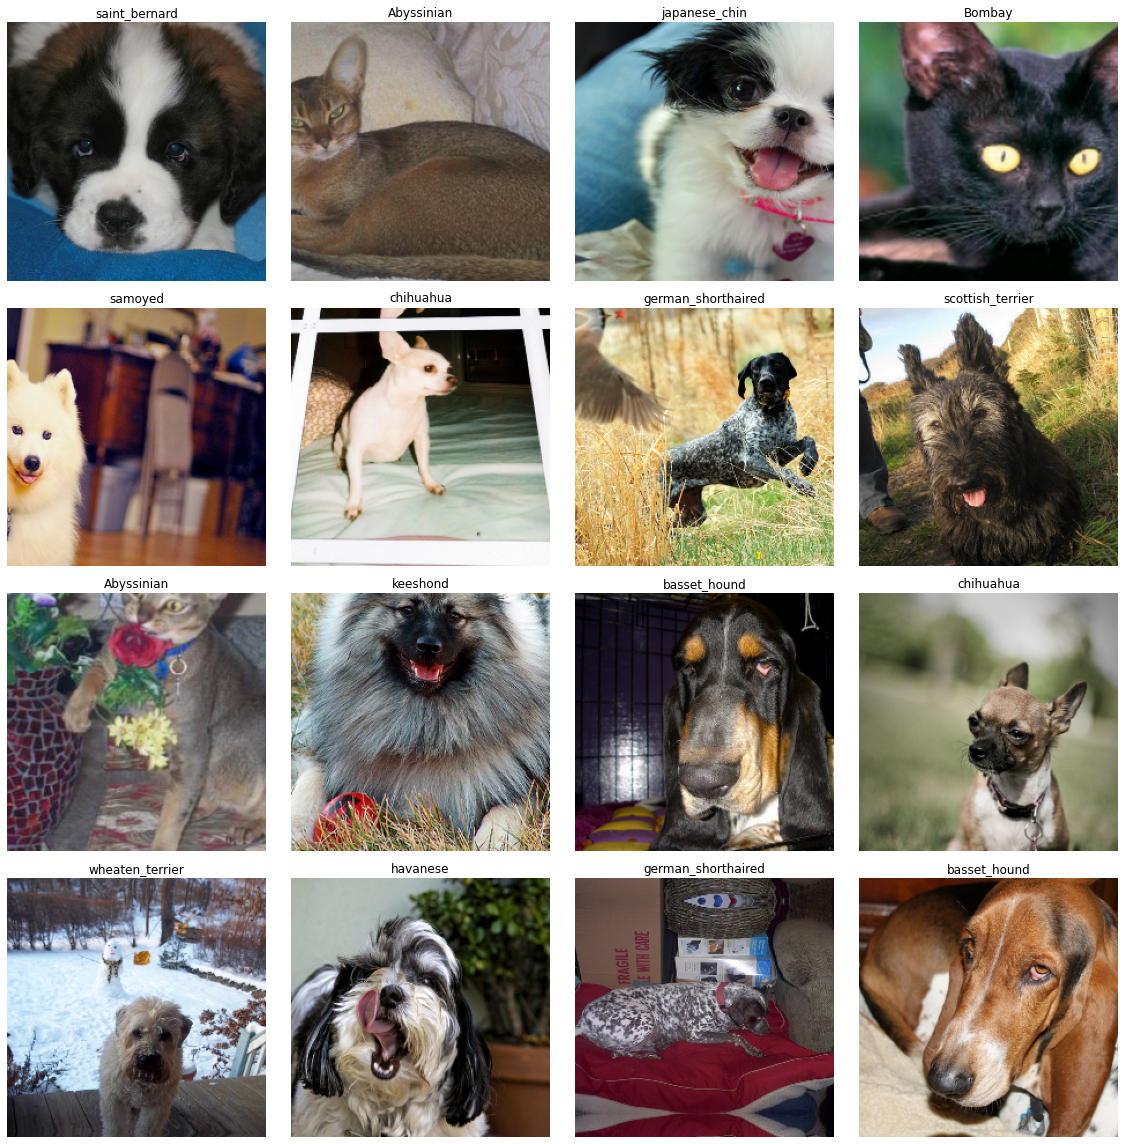

In [13]:
data.show_batch(rows = 4, fig_size = (7, 6))

In [14]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

#Resnet34

In [15]:
learn = create_cnn(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [16]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage-1')

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

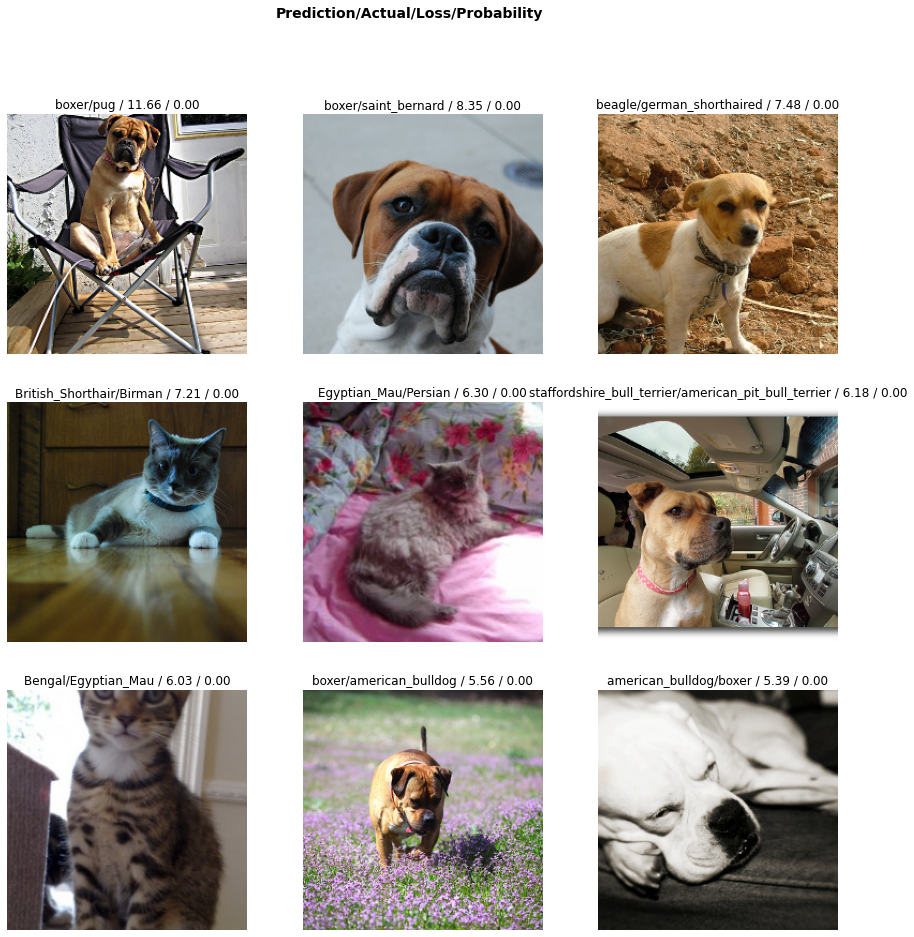

In [23]:
interp.plot_top_losses(9, figsize = (15, 15))

In [24]:
doc(interp.plot_top_losses)

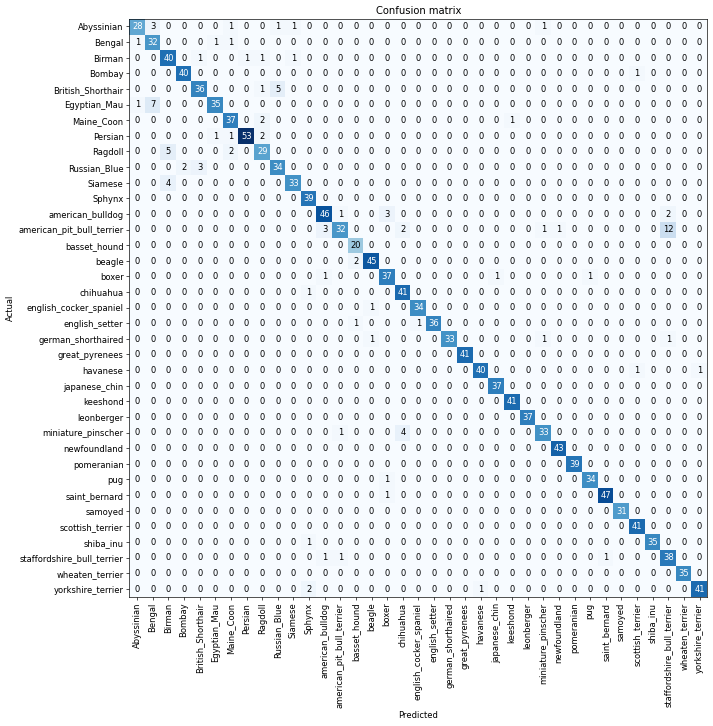

In [26]:
interp.plot_confusion_matrix(figsize= (12, 12), dpi = 60)

In [27]:
interp.most_confused(min_val=2)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 12),
 ('Egyptian_Mau', 'Bengal', 7),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('Ragdoll', 'Birman', 5),
 ('Siamese', 'Birman', 4),
 ('miniature_pinscher', 'chihuahua', 4),
 ('Abyssinian', 'Bengal', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('american_bulldog', 'boxer', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('Maine_Coon', 'Ragdoll', 2),
 ('Persian', 'Ragdoll', 2),
 ('Ragdoll', 'Maine_Coon', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('american_pit_bull_terrier', 'chihuahua', 2),
 ('beagle', 'basset_hound', 2),
 ('yorkshire_terrier', 'Sphynx', 2)]

In [0]:
learn.unfreeze()

In [29]:
learn.fit_one_cycle(1)

In [30]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
British_Shorthair,yorkshire_terrier,miniature_pinscher,staffordshire_bull_terrier,British_Shorthair
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
chihuahua,Sphynx,Egyptian_Mau,wheaten_terrier,havanese
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): 

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


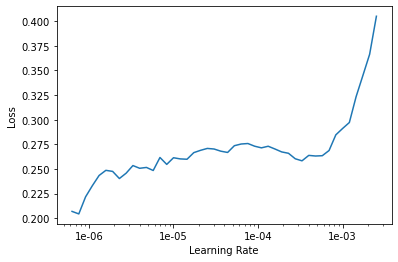

In [36]:
learn.recorder.plot()

In [37]:
learn.unfreeze
learn.fit_one_cycle(2, max_lr=slice(1e-7, 1e-6))

#Resnet50

In [40]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size = 224, bs=32)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
British_Shorthair,yorkshire_terrier,miniature_pinscher,Ragdoll,staffordshire_bull_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
newfoundland,Ragdoll,leonberger,staffordshire_bull_terrier,British_Shorthair
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

In [41]:
learn2 = cnn_learner(data, models.resnet50, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [42]:
learn2.fit_one_cycle(5)

In [0]:
learn2.save('stage-1-50')

In [47]:
learn2.unfreeze()
learn2.fit_one_cycle(1, max_lr = slice(1e-7, 1e-6))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


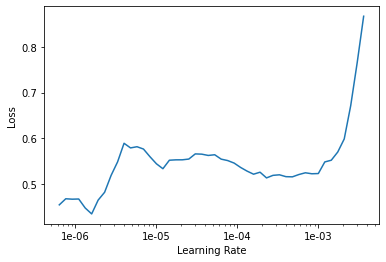

In [49]:
learn2.lr_find()
learn2.recorder.plot()

In [50]:
learn2.unfreeze()
learn2.fit_one_cycle(1, max_lr = slice(1e-6, 1e-3))

In [51]:
interp = ClassificationInterpretation.from_learner(learn2)

In [52]:
interp.most_confused(min_val = 2)

[('Ragdoll', 'Birman', 13),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 10),
 ('Russian_Blue', 'British_Shorthair', 5),
 ('Siamese', 'Birman', 5),
 ('english_setter', 'english_cocker_spaniel', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Abyssinian', 'Bengal', 3),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Maine_Coon', 'Persian', 3),
 ('chihuahua', 'miniature_pinscher', 3),
 ('Egyptian_Mau', 'Bengal', 2),
 ('american_bulldog', 'boxer', 2),
 ('american_bulldog', 'saint_bernard', 2),
 ('beagle', 'american_bulldog', 2),
 ('beagle', 'basset_hound', 2),
 ('boxer', 'staffordshire_bull_terrier', 2),
 ('german_shorthaired', 'english_setter', 2),
 ('pomeranian', 'keeshond', 2),
 ('pomeranian', 'samoyed', 2)]